# Normalização e análise da variação das classes EP2.2

In [1]:
import os
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np

from skimage import io, exposure 

## Criação do normalizedDataset com equalização de histograma

In [2]:
def equalize_histogram(img):
    equalized_img = exposure.equalize_hist(img)
    uint8_equalized_img = (equalized_img * 255).astype(np.uint8)
    
    return uint8_equalized_img

In [3]:
AUGMENTED_DATASET_PATH = Path('augmented_dataset')
NORMALIZED_DATASET_PATH = Path('normalized_dataset')

for filename in AUGMENTED_DATASET_PATH.rglob('*'):
    if filename.is_file():
        head, tail = os.path.split(filename)
        object_class = head.split('/')[-1]
        normalized_path = f'{NORMALIZED_DATASET_PATH}/{object_class}'

        os.makedirs(normalized_path, exist_ok=True)
        
        img = io.imread(filename)
        equalized_img = equalize_histogram(img)
        io.imsave(f'{normalized_path}/{tail}', equalized_img)

In [4]:
normalized_dataset_images = [name for name in Path(NORMALIZED_DATASET_PATH).rglob('*') if name.is_file()]
len(normalized_dataset_images)

6480

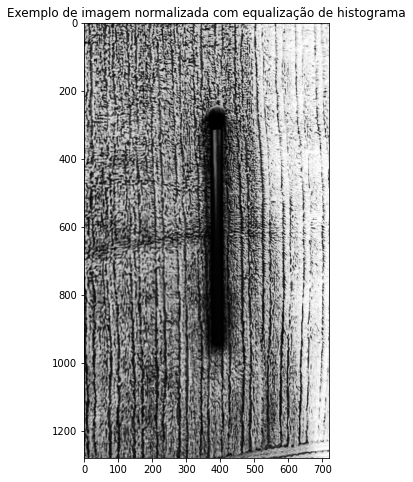

In [5]:
equalized_fig = plt.figure(figsize=(12, 8))
equalized_ax = equalized_fig.add_subplot(111)

equalized_ax.imshow(equalized_img, cmap='gray')
equalized_ax.set_title('Exemplo de imagem normalizada com equalização de histograma');

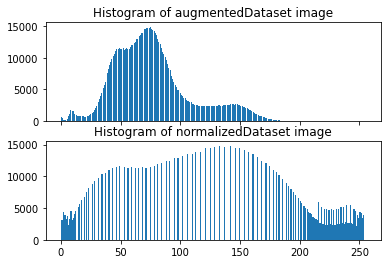

In [6]:
fig, axes = plt.subplots(2, sharex=True)

axes[0].hist(img.ravel(), bins = 256);
axes[1].hist(equalized_img.ravel(), bins = 256);

axes[0].set_title('Histogram of augmentedDataset image');
axes[1].set_title('Histogram of normalizedDataset image');

## Análise

### Protótipo médio de cada classe

O protótipo médio de cada classe mostra a imagem "média" para cada dataset. Temos aqui um total de 30 imagens (3 datasets e 10 classes). É possível observar que o resultado é uma imagem bastante borrada que se assemelha ao objeto da classe, mas não mostra nenhuma informação de forma clara. Como as imagens nos meus datasets estavam com o objeto relativemente centralizado, é possível até reconhecer objetos (exemplo: pincel de maquiagem). 

In [7]:
def get_images_from_object_class(dataset_path, object_class):
    list_of_images = []
    dataset_path = dataset_path / object_class
    
    for filename in dataset_path.rglob('*'):
        if filename.is_file():
            head, tail = os.path.split(filename)
            object_class = head.split('/')[-1]

            img = io.imread(filename)
            list_of_images.append(img)
            
    return list_of_images


def mean_prototype(images):
    sum_of_images = np.sum(images, axis=0) / len(images)
    mean_prototype_img = sum_of_images.astype(np.uint8)
    
    return mean_prototype_img


def plot_mean_prototype(mean_prototype, object_class, dataset):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(mean_prototype, cmap='gray')
    ax.set_title(f'Protótipo médio de {object_class} no {dataset}')

#### originalGrayDataset

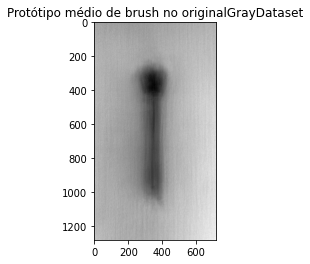

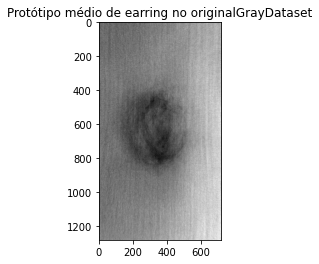

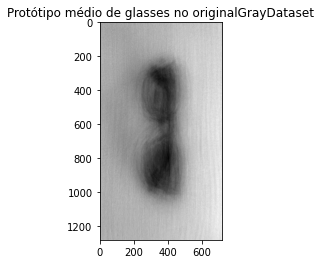

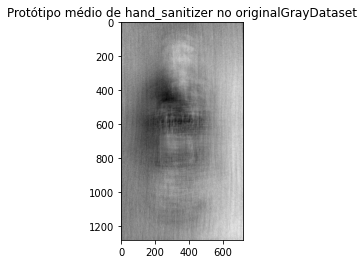

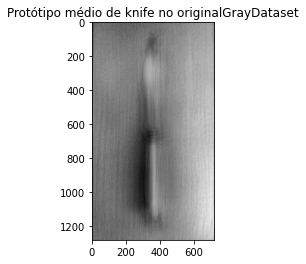

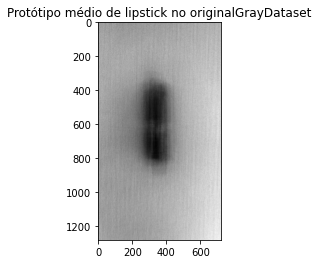

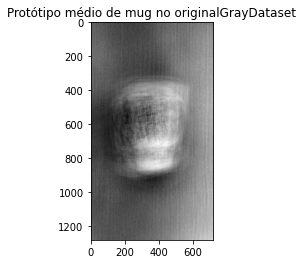

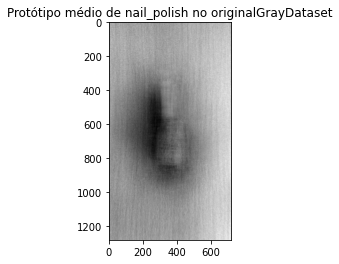

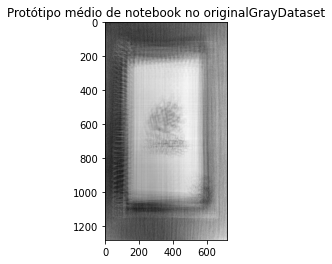

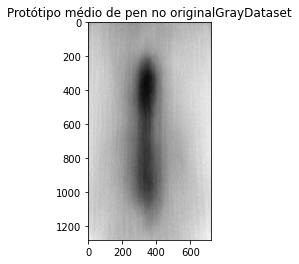

In [8]:
ORIGINAL_GRAY_DATASET_PATH = Path('original_gray_dataset')

OBJECT_CLASSES = ['brush', 'earring', 'glasses', 'hand_sanitizer', 'knife', 'lipstick', 'mug', 'nail_polish', 'notebook', 'pen']

for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(ORIGINAL_GRAY_DATASET_PATH, c)
    plot_mean_prototype(mean_prototype(imgs), c, 'originalGrayDataset')

#### augmentedDataset

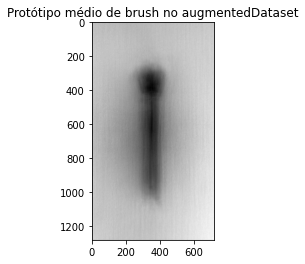

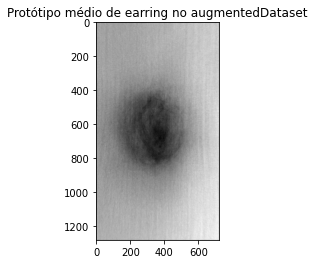

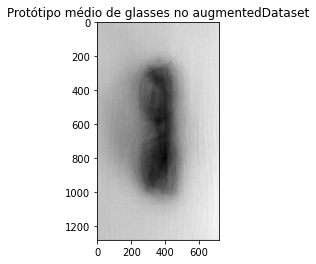

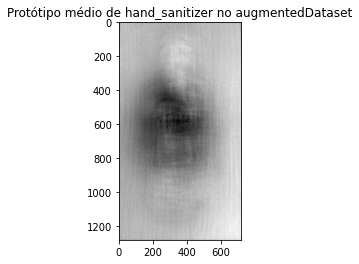

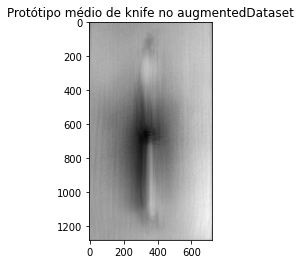

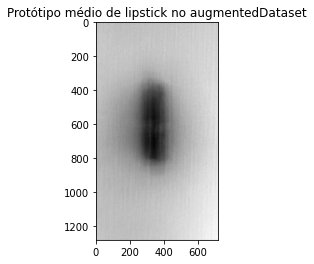

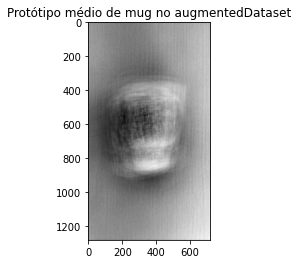

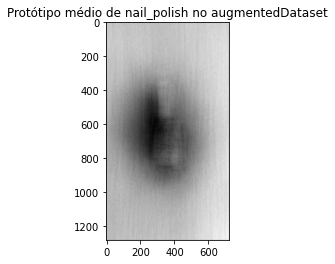

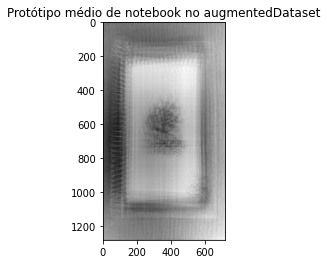

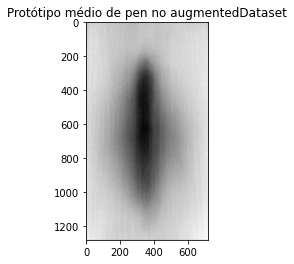

In [9]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(AUGMENTED_DATASET_PATH, c)
    plot_mean_prototype(mean_prototype(imgs), c, 'augmentedDataset')

#### normalizedDataset

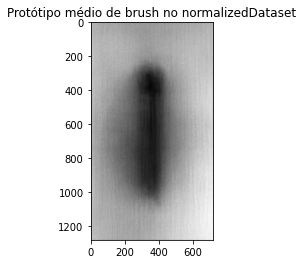

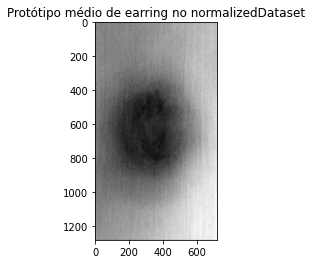

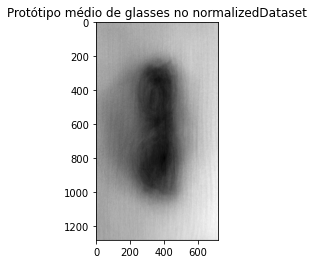

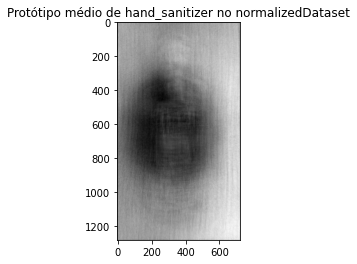

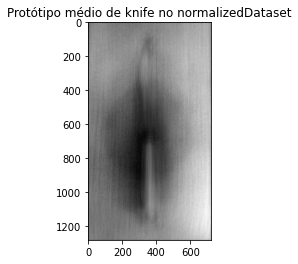

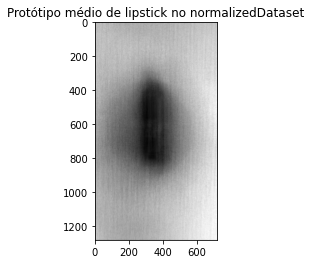

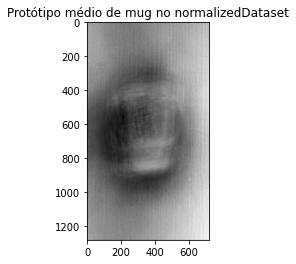

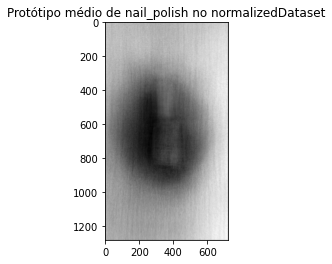

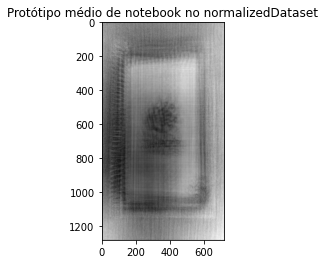

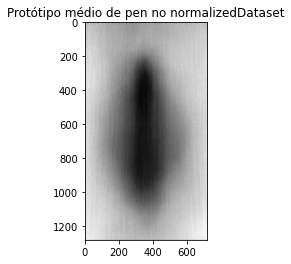

In [10]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(NORMALIZED_DATASET_PATH, c)
    plot_mean_prototype(mean_prototype(imgs), c, 'normalizedDataset')

### Histograma médio e variância de cada classe

Para cada dataset plotamos o histograma médio de cada classe e a variância do histograma médio de cada classe (nesse caso, o desvio padrão, pois acredito que a interpretação é mais intuitiva). Tentei colocar ambos no mesmo gráfico, mas a barra de erro é maior do que a barra do histograma, o que significa que a variância é maior do que a média, logo, existe muita variação para cada intensidade dos pixels dentro das imagens de um dataset.

In [11]:
def histogram_bin_values(img):
    values, idx = exposure.histogram(img)
    if len(idx) < 256:
        zeros = np.zeros(256 - len(idx), dtype=np.uint8)
        values = np.concatenate([values, zeros], axis=None)
    
    return values

#### originalGrayDataset

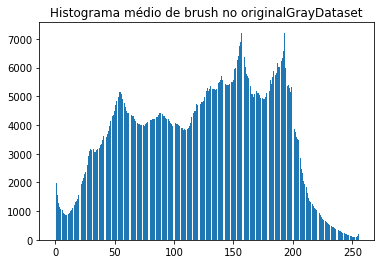

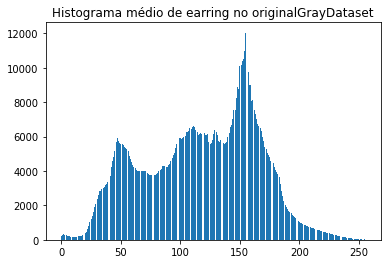

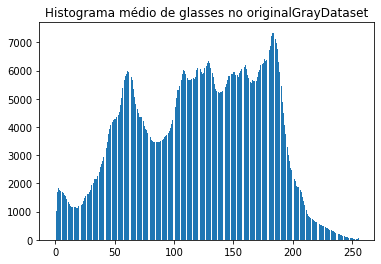

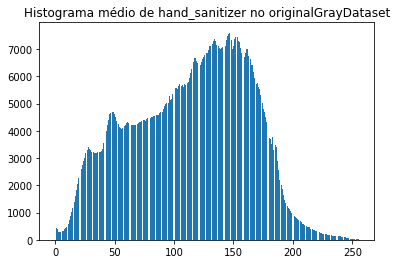

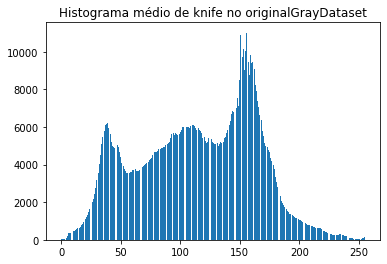

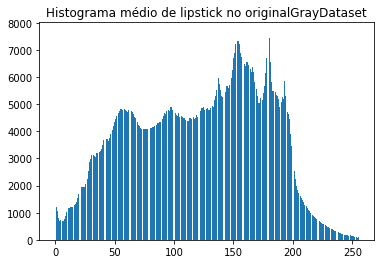

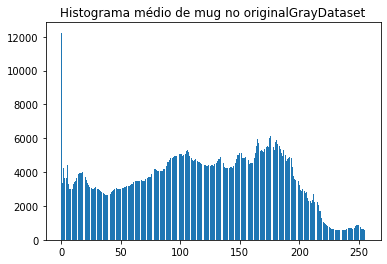

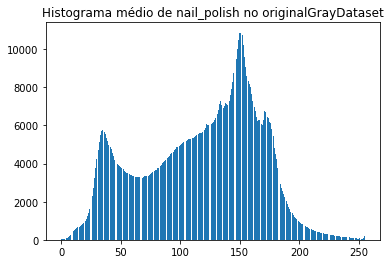

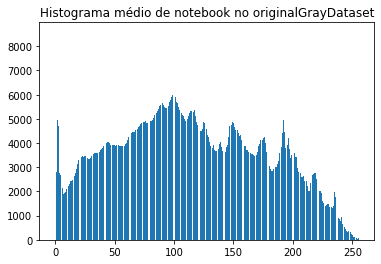

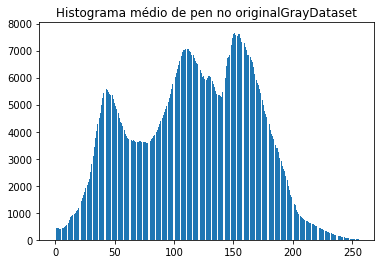

In [12]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(ORIGINAL_GRAY_DATASET_PATH, c)
    mean_hist = np.mean([histogram_bin_values(i) for i in imgs], axis=0)
    plt.bar(np.arange(len(mean_hist)), mean_hist)
    plt.title(f'Histograma médio de {c} no originalGrayDataset')
    plt.show()

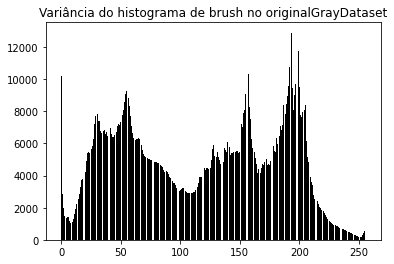

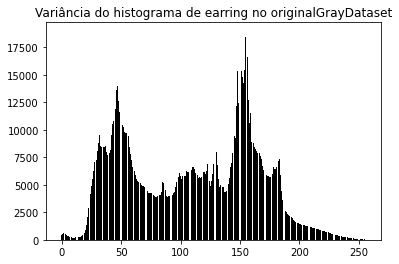

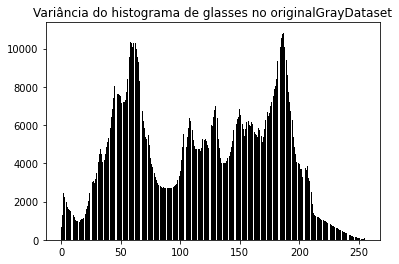

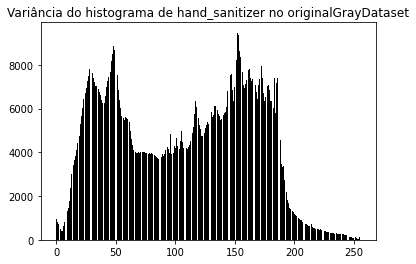

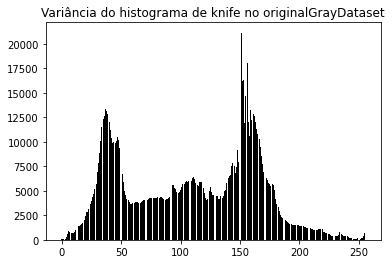

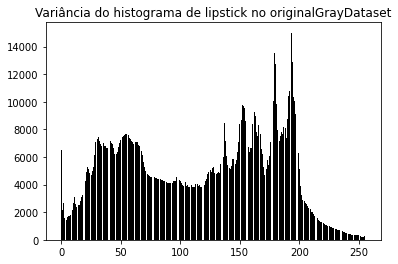

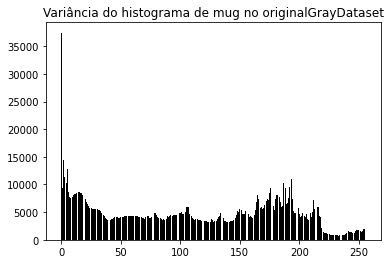

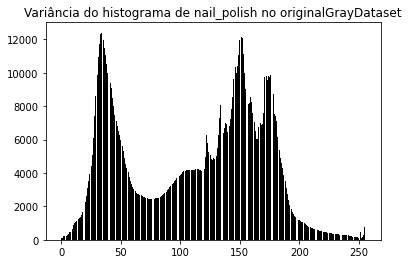

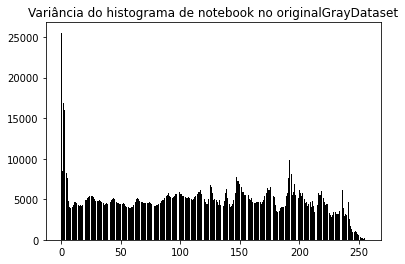

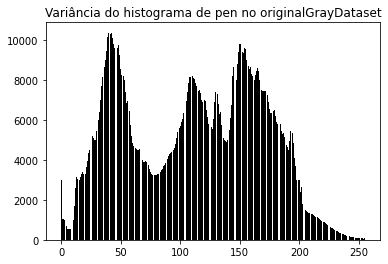

In [13]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(ORIGINAL_GRAY_DATASET_PATH, c)
    bin_values = [histogram_bin_values(i) for i in imgs]
    error_hist = np.std(bin_values, axis=0)
    plt.bar(np.arange(len(error_hist)), error_hist, color='black')
    plt.title(f'Variância do histograma de {c} no originalGrayDataset')
    plt.show()

#### augmentedDataset

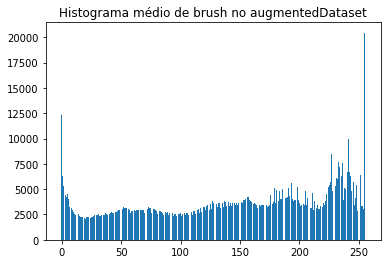

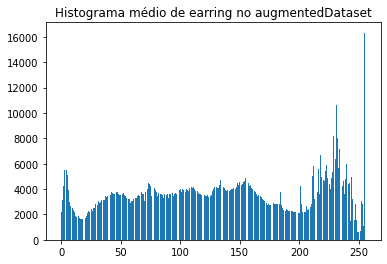

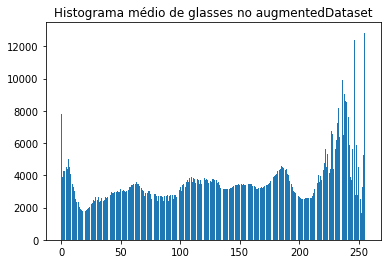

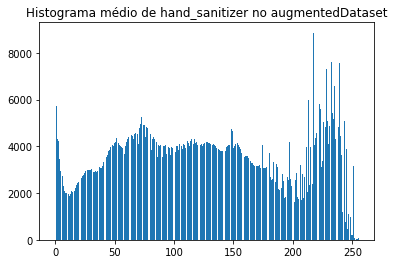

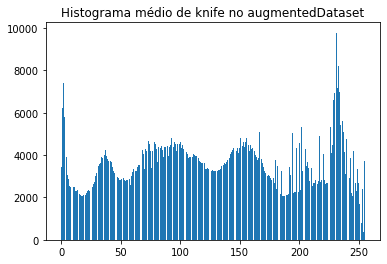

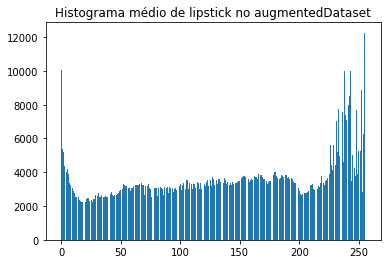

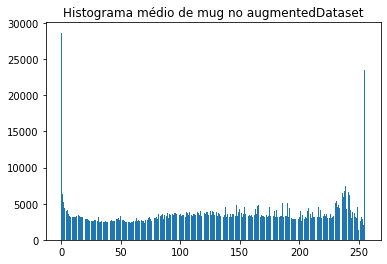

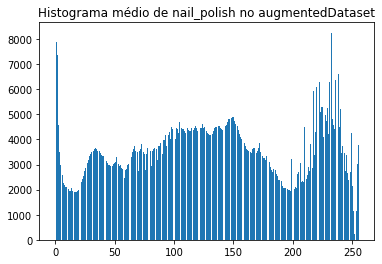

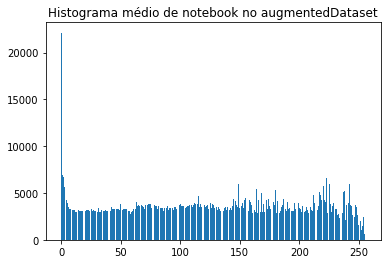

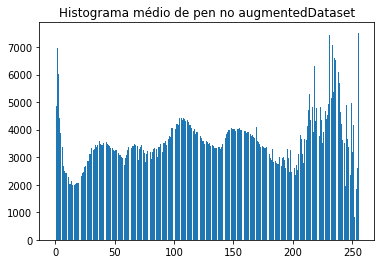

In [14]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(AUGMENTED_DATASET_PATH, c)
    mean_hist = np.mean([histogram_bin_values(i) for i in imgs], axis=0)
    plt.bar(np.arange(len(mean_hist)), mean_hist)
    plt.title(f'Histograma médio de {c} no augmentedDataset')
    plt.show()

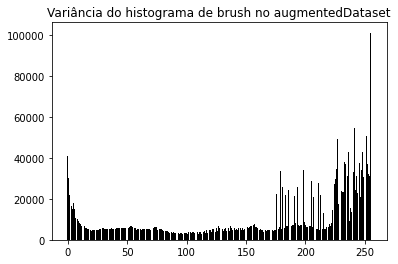

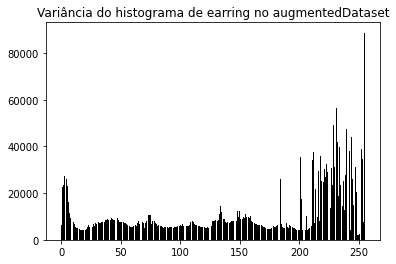

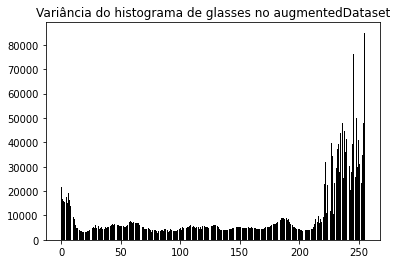

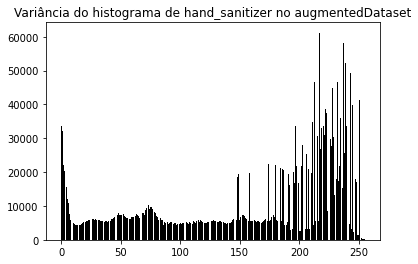

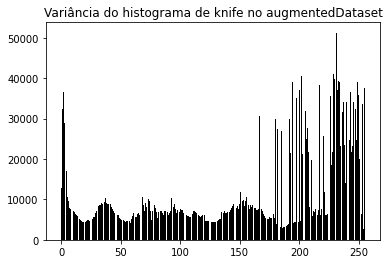

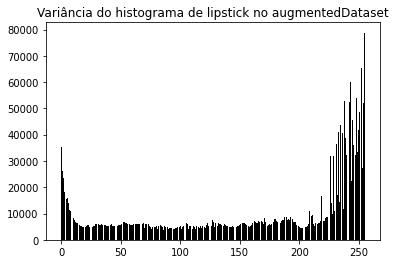

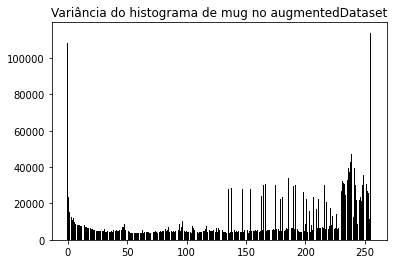

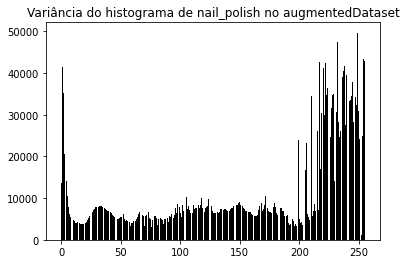

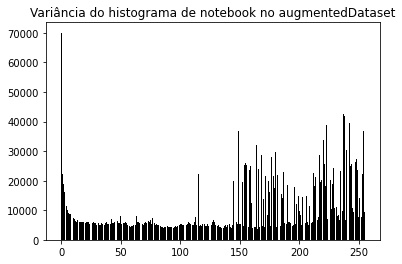

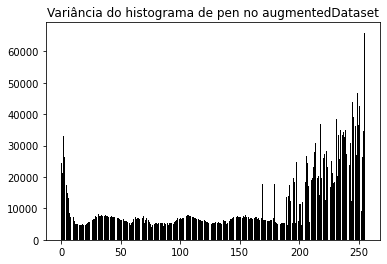

In [15]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(AUGMENTED_DATASET_PATH, c)
    bin_values = [histogram_bin_values(i) for i in imgs]
    error_hist = np.std(bin_values, axis=0)
    plt.bar(np.arange(len(error_hist)), error_hist, color='black')
    plt.title(f'Variância do histograma de {c} no augmentedDataset')
    plt.show()

#### normalizedDataset

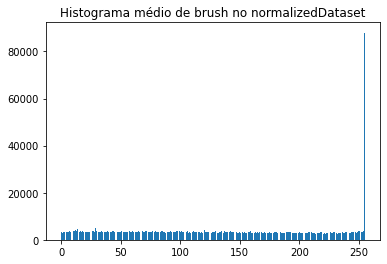

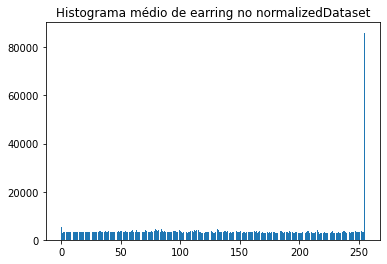

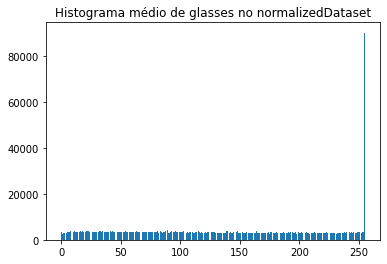

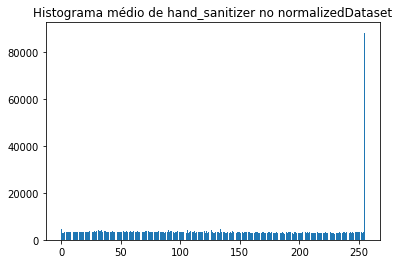

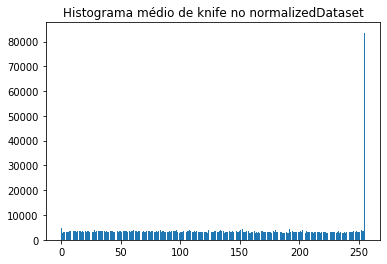

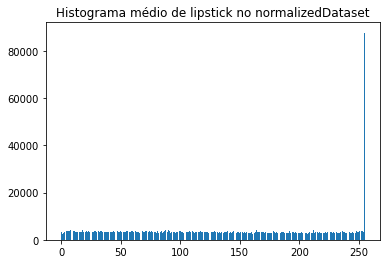

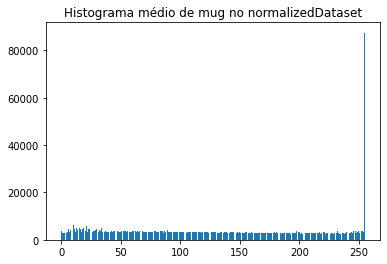

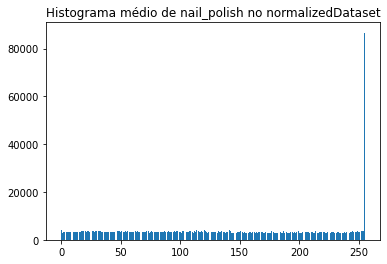

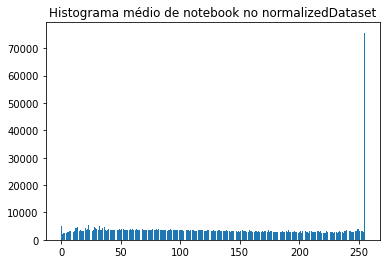

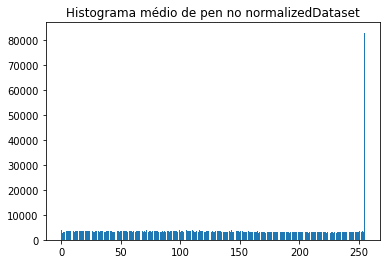

In [16]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(NORMALIZED_DATASET_PATH, c)
    mean_hist = np.mean([histogram_bin_values(i) for i in imgs], axis=0)
    plt.bar(np.arange(len(mean_hist)), mean_hist)
    plt.title(f'Histograma médio de {c} no normalizedDataset')
    plt.show()

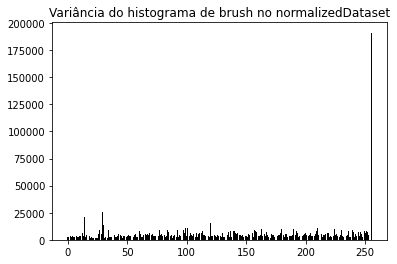

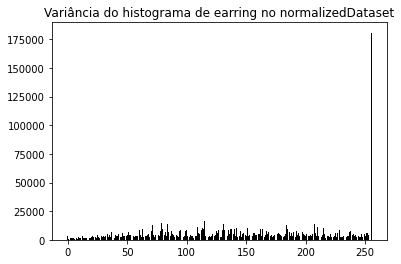

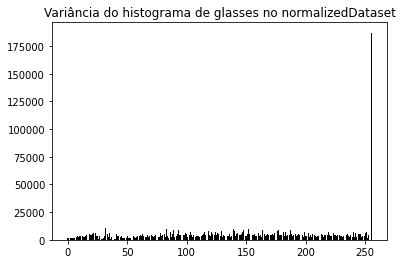

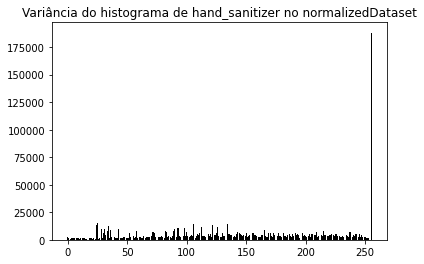

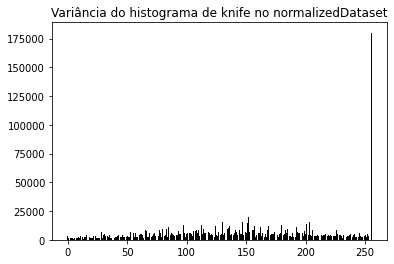

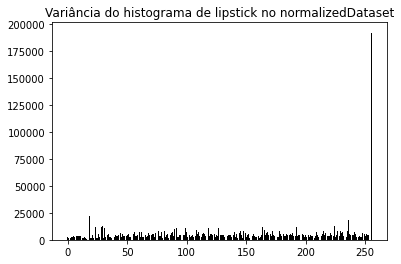

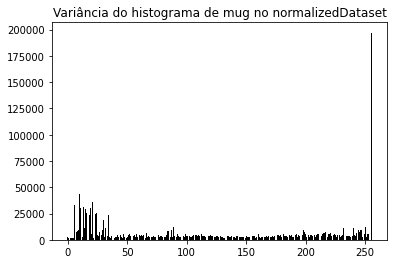

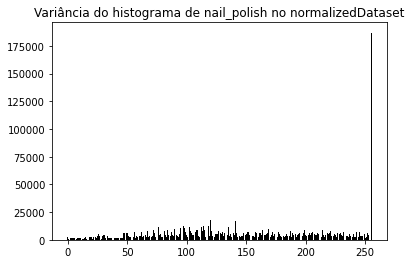

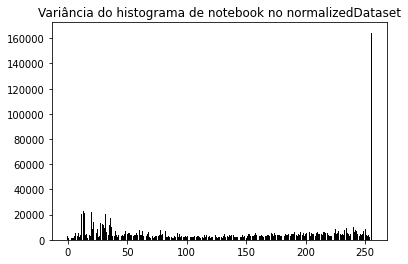

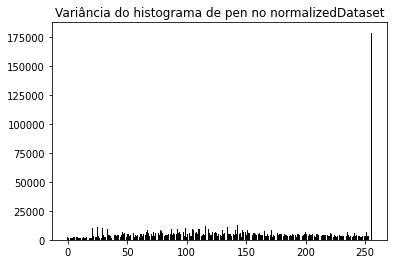

In [17]:
for c in OBJECT_CLASSES:
    imgs = get_images_from_object_class(NORMALIZED_DATASET_PATH, c)
    bin_values = [histogram_bin_values(i) for i in imgs]
    error_hist = np.std(bin_values, axis=0)
    plt.bar(np.arange(len(error_hist)), error_hist, color='black')
    plt.title(f'Variância do histograma de {c} no normalizedDataset')
    plt.show()

Como esperado, a variância no augmentedDataset aumentou muito, podemos ver isso através do eixo dos gráficos de variância, que aumentou muito em relação ao eixo y dos gráficos do originalGrayDataset. Isso acontece devido à grande diversidade de imagens que passaram por transformações que afetam a intensidade dos níveis de cinza de forma diferente. 

E no dataset normalizado, é possível ver que o histograma médio de cada classe é muito mais uniforme, devido ao processo de equalização. Essa uniformidade nos histogramas médios das classes é observável nos gráficos da variância, nos quais ela também é uniforme e menor do que no dataset anterior. Existe um pico no valor máximo de intensidade do pixel (255) e acredito que a equalização de histograma saturou as imagens que já estavam muito claras. Porém, se olharmos todas as outras intensidades, o comportamento está dentro do esperado.